## Feature of Text
### 201923768 최준호
### 비즈니스 애널리틱스 (캡스톤)
-------

- Text Classification: 문서나 텍스트를 분류하는 것에 도움을 줌. 단어를 분석하므로서 레이블을 부여할 수 있음 -> 긍정 & 부정 주로 분류됨
- Multi-label classifier: 해당 텍스트에 여러개의 레이블을 부여할 수 있음
- feature set: 값에 이름을 부여하는 방식인 Key-Value Mapping 임
- 보통 텍스트 분류는 단어들이며 값들은 True에 해당된다
- 알지못하는 단어가 있을 경우, 그 단어들은 생략이되며 값들이 False로 나옴

### Bag of Words 활용하기
- NLTK classifier 통해 텍스트를 딕션러니화 시키는 것
- 그중에 제일 간단한 방법이며 단어의 순서, 단어의 반복성 신경안쓰고 단어가 리스트에 있는지를 신경씀

In [4]:
# 주어진 문서(word tokenize된 결과)에 대해 feature set을 dictionary 형태로 구성해서 반환
def bag_of_words(words):
    return dict([(word, True) for word in words]) #있는 단어들에 대해 True로 표시, 없는 단어는 표시 안 함

In [17]:
bag_of_words(['hello', 'this', 'is', 'Patrick','hello'])

{'hello': True, 'this': True, 'is': True, 'Patrick': True}

In [18]:
bag_of_words(['Yellow', 'Spongebob', 'LIKE', 'oK?','like'])

{'Yellow': True, 'Spongebob': True, 'LIKE': True, 'oK?': True, 'like': True}

In [25]:
bag_of_words(['JagaBiya', 'Steam', 'Ajou', 'LOL', '한국',"<<<<<<"])

{'JagaBiya': True,
 'Steam': True,
 'Ajou': True,
 'LOL': True,
 '한국': True,
 '<<<<<<': True}

- 여러가지 시도해보았는데 다 True로 나옴
- 반복되는 단어는 제외됨 (소문자 대문자 신경씀 LIKE =/= like)
- ?><":{}{ 다 단어로 처리됨

## NLTK Corpus
### movie_reviews
NLTK Corpus 중 movie review 수집 데이터로, 감성분석 결과(pos, neg)가 label로 붙어 있음

Compiler: Pang, Lee

Contents: 2k movie reviews with sentiment polarity classification

In [31]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print(movie_reviews.fileids()[:5]) #id를 5개까지만 출력
print(movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('"neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('"pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('id:', fileid)
print(movie_reviews.raw(fileid)[:300]) #첫번째 문서의 내용을 300자까지만 출력
print(movie_reviews.sents(fileid)[:5]) #첫번째 문서를 sentence tokenize한 결과 중 앞 다섯 문장
print(movie_reviews.words(fileid)[2:4]) #첫번째 문서를 word tokenize한 결과 중 3번째~4번쨰 단어

review count: 2000
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt']
['neg', 'pos']
"neg" reviews: 1000
"pos" reviews: 1000
id: neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ['one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.'], ['what', "'", 's', 'the', 'deal', '?'], ['watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.']]
['two', 'teen']


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\COM\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


### bag of words model을 이용한 feature 추출 첫번째 방법
label 별로 각 문서들에 대한 feature를 생성 - bag_of_words() 함수를 이용

collections(https://docs.python.org/2/library/collections.html) - High-performance container datatypes - 를 이용하여 feature set을 저장. 하나의 label(ex. 'neg')에 1,000개의 feature set을 할당해야 하므로 단순 dictionary가 아닌 container를 사용. 각 feature는 dictionary로 이루어져 있음

In [32]:
import collections

#feature 추출을 위한 함수로, 앞서 정의한 bag_of_words()를 사용
def label_feats_from_corpus(corp, feature_detector=bag_of_words): 
    label_feats = collections.defaultdict(list) # container 초기화
    for label in corp.categories(): #''neg', 'pos' 각 label에 대해
        for fileid in corp.fileids(categories=[label]): #각 label에 해당하는 문서들에 대해
            feats = feature_detector(corp.words(fileids=[fileid])) #주어진 문서를 bag_of_words feature로 변환
            label_feats[label].append(feats) #container에 feature 추가
    return label_feats

lfeats = label_feats_from_corpus(movie_reviews)
print(lfeats.keys())

dict_keys(['neg', 'pos'])


In [33]:
len(lfeats['neg'])

1000

In [34]:
", ".join(lfeats['neg'][0])

'plot, :, two, teen, couples, go, to, a, church, party, ,, drink, and, then, drive, ., they, get, into, an, accident, one, of, the, guys, dies, but, his, girlfriend, continues, see, him, in, her, life, has, nightmares, what, \', s, deal, ?, watch, movie, ", sorta, find, out, critique, mind, -, fuck, for, generation, that, touches, on, very, cool, idea, presents, it, bad, package, which, is, makes, this, review, even, harder, write, since, i, generally, applaud, films, attempt, break, mold, mess, with, your, head, such, (, lost, highway, &, memento, ), there, are, good, ways, making, all, types, these, folks, just, didn, t, snag, correctly, seem, have, taken, pretty, neat, concept, executed, terribly, so, problems, well, its, main, problem, simply, too, jumbled, starts, off, normal, downshifts, fantasy, world, you, as, audience, member, no, going, dreams, characters, coming, back, from, dead, others, who, look, like, strange, apparitions, disappearances, looooot, chase, scenes, tons, we

In [35]:
lfeats['neg'][0]

{'plot': True,
 ':': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'to': True,
 'a': True,
 'church': True,
 'party': True,
 ',': True,
 'drink': True,
 'and': True,
 'then': True,
 'drive': True,
 '.': True,
 'they': True,
 'get': True,
 'into': True,
 'an': True,
 'accident': True,
 'one': True,
 'of': True,
 'the': True,
 'guys': True,
 'dies': True,
 'but': True,
 'his': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'him': True,
 'in': True,
 'her': True,
 'life': True,
 'has': True,
 'nightmares': True,
 'what': True,
 "'": True,
 's': True,
 'deal': True,
 '?': True,
 'watch': True,
 'movie': True,
 '"': True,
 'sorta': True,
 'find': True,
 'out': True,
 'critique': True,
 'mind': True,
 '-': True,
 'fuck': True,
 'for': True,
 'generation': True,
 'that': True,
 'touches': True,
 'on': True,
 'very': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'it': True,
 'bad': True,
 'package': True,
 'which': True,
 'is': True,
 'makes': True

#### bag of words model을 이용한 feature 추출 두번째 방법
1. 각 문서를 먼저 word list와 label의 list로 변환
2. feature 추출 대상이 되는 단어 집합 구성 - 이 때 전체 words들에 대한 frequency data를 이용해 상위 n개의 단어만으로 feature 구성이 가능
3. 각 문서에 대해 feature 추출 대상 단어들을 대상으로 해당 단어가 문서에 있는 지의 여부를 dictionary로 생성
4. 생성된 feature와 label로 문서들에 대한 feature set을 구성

In [36]:
from nltk.corpus import movie_reviews
import random
# category 별로 fileid를 추출하고, 해당 fileid에 대해 문서의 word tokenize된 결과를 가져와서 
# documents 집합을 구성
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [37]:
#nltk FreqDist 함수를 이용하여 단어별로 빈도 수를 계산
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [38]:
for word in list(all_words)[:20]:
    print(word, all_words[word])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822
s 18513
" 17612
it 16107
that 15924
- 15595
) 11781
( 11664
as 11378
with 10792
for 9961


In [39]:
sorted_features = sorted(all_words, key=all_words.get, reverse=True)
for word in sorted_features[:20]:
    print(word, all_words[word])
print(sorted_features[:20])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822
s 18513
" 17612
it 16107
that 15924
- 15595
) 11781
( 11664
as 11378
with 10792
for 9961
[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for']


In [41]:
word_features = sorted_features[:1500] #빈도가 높은 상위 1500개의 단어만 추출하여 features를 구성

print(word_features[:60])

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':']


In [42]:
#주어진 document를 feature로 변환하는 함수, word_features를 사용
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words) #1500개의 단어에 대해 True, False로 입력
    return features

In [43]:
#위에서 만든 documents 집합에 대해 feature set을 생성
featuresets = [(document_features(d, word_features), c) for (d,c) in documents]

In [44]:
print(len(featuresets[0][0])) #첫째 feature set의 첫째 element 즉 bag_of_words feature의 수 - 상위 1500개 단어
print(featuresets[0][1]) #첫째 feature set의 둘째 element 즉 label
print(featuresets[0][0]) # 첫째 feature set의 내용
# word_feature에 나오지 않은 단어들이 있으면 False로 표시됨

1500
pos
{',': True, 'the': True, '.': True, 'a': True, 'and': True, 'of': True, 'to': True, "'": True, 'is': True, 'in': True, 's': True, '"': True, 'it': True, 'that': True, '-': True, ')': True, '(': True, 'as': True, 'with': True, 'for': True, 'his': True, 'this': True, 'film': True, 'i': True, 'he': True, 'but': True, 'on': True, 'are': True, 't': True, 'by': True, 'be': False, 'one': True, 'movie': False, 'an': True, 'who': True, 'not': True, 'you': True, 'from': True, 'at': True, 'was': True, 'have': True, 'they': True, 'has': True, 'her': False, 'all': True, '?': True, 'there': True, 'like': True, 'so': True, 'out': False, 'about': True, 'up': True, 'more': True, 'what': True, 'when': True, 'which': True, 'or': True, 'she': False, 'their': False, ':': True, 'some': True, 'just': False, 'can': False, 'if': False, 'we': False, 'him': True, 'into': False, 'even': True, 'only': True, 'than': True, 'no': True, 'good': True, 'time': True, 'most': False, 'its': False, 'will': False, '

### BOW feature set을 이용한 분류 맛보기
- BOW feature set을 이용한 분류 맛보기
- https://www.nltk.org/book/ch06.html Section 1.3
- NLTK Naive Bayes 분류기를 사용 http://www.nltk.org/howto/classify.html
- 주어진 문서의 label이 'neg'인지, 'pos'인지를 판단하는 분류기를 학습

In [45]:
train_set, test_set = featuresets[50:], featuresets[:50] #train set과 test set으로 분리

classifier = nltk.NaiveBayesClassifier.train(train_set) # train set으로 학습
print(nltk.classify.accuracy(classifier, test_set)) # test set으로 분류기 성능을 평가
classifier.show_most_informative_features(10) #분류기에서 가장 중요한 영향을 미치는 단어 상위 10개

0.74
Most Informative Features
                   mulan = True              pos : neg    =      7.8 : 1.0
                  wasted = True              neg : pos    =      5.6 : 1.0
                   awful = True              neg : pos    =      5.5 : 1.0
                  poorly = True              neg : pos    =      5.4 : 1.0
                    lame = True              neg : pos    =      5.3 : 1.0
                   waste = True              neg : pos    =      4.9 : 1.0
              ridiculous = True              neg : pos    =      4.8 : 1.0
                   worst = True              neg : pos    =      4.6 : 1.0
                    dull = True              neg : pos    =      4.0 : 1.0
                  stupid = True              neg : pos    =      3.8 : 1.0


In [46]:
testfeat = bag_of_words(['I', 'am', 'the', 'best']) 
print(classifier.classify(testfeat))
testfeat = bag_of_words(['Do', 'you', 'know', 'Avenger'])
print(classifier.classify(testfeat))
negfeat = bag_of_words(['this', 'shit','is', 'not', 'needed']) # 쓰레기 필요 없어
print(classifier.classify(negfeat))
posfeat = bag_of_words(['ending', 'music', 'was', 'splendid']) # 엔딩 음악 휼룡해
print(classifier.classify(posfeat))

pos
neg
neg
pos


### Count Vector with Scikit
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [47]:
# data 준비, 입력이 raw text임
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
cv = CountVectorizer(vocabulary=word_features) #빈도수 상위 1,500개의 단어만 사용하여 count vector 객체를 생성
print(cv) #객체 parameter들을 확인

CountVectorizer(vocabulary=[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is',
                            'in', 's', '"', 'it', 'that', '-', ')', '(', 'as',
                            'with', 'for', 'his', 'this', 'film', 'i', 'he',
                            'but', 'on', 'are', 't', 'by', ...])


In [52]:
print('reviews count:', len(reviews))

reviews count: 2000


In [53]:
X = cv.fit_transform(reviews) #review를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names()[:100]) # count vector에 사용된 feature 이름을 반환

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [57]:
print(X[0].toarray()[0, :50]) #변환된 결과의 첫째 feature set 중에서 앞 50개를 출력
print(max(X[0].toarray()[0])) #변환된 결과의 첫째 feature set 중에서 max 값

[ 0 38  0  0 20 16 16  0 12  8  0  0 25 13  0  0  0  1  5  4  1 10  6  0
  1 10  4 13  0  2  1  3  6  3  3  3  3  4  0  0  2  5  3  4  6  0 10  3
  3  3]
38


In [58]:
for word, count in zip(cv.get_feature_names()[:10], X[0].toarray()[0, :10]):
    print(word, ':', count)

, : 0
the : 38
. : 0
a : 0
and : 20
of : 16
to : 16
' : 0
is : 12
in : 8


### 문서 간 유사도 계산 및 가장 유사한 문서 검색
#### 코사인 유사도 (Cosine similarity)

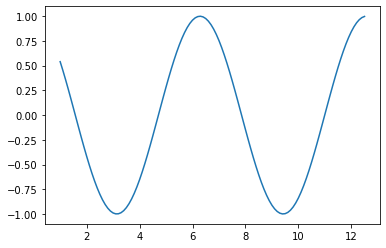

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1,4*np.pi,0.1)   # start,stop,step
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

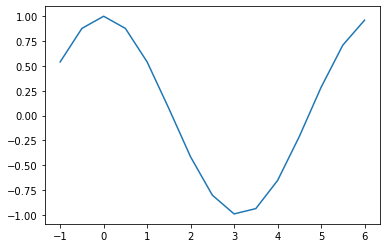

In [66]:
x = np.arange(-1,2*np.pi,0.5)   # start,stop,step
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

new_review = "Twiggle made sure to point out that he almost wasn't the first person to achieve this monumental feat. A Spelunky 2 player from South Korea named Nokduro was on a very promising run"
new_vec = cv.transform([new_review]) #문서를 count vector로 변환

sim_result = cosine_similarity(new_vec, X) #변환된 count vector와 기존 값들과의 similarity 계산

In [95]:
# https://docs.python.org/3/howto/sorting.html
print(sorted(sim_result[0], reverse=True)[:10])

[0.5070350691263503, 0.47059951224373825, 0.46377301258658177, 0.45741912629949966, 0.4502736869795565, 0.44984438076172883, 0.44886848212908825, 0.44715922424386134, 0.4468872687358982, 0.445464831087065]


In [96]:
import numpy as np
np.argmax(sim_result[0])

699

In [97]:
print(reviews[699])

okay , i just don't know why , but i seem to be getting this diversion to disney-made real-life actors movies . . . as 
well as real-life acting tim allen movies . 
i couldn't even make it through " the santa clause , " so why did i even see this ? 
 ( just to make an idle point , i did like " toy story , " but that was good ) also , i have this aversion to bad french farces , and if they remake them into american films . 
well , this is my excuse : it was prom night , i'm not a prom person , my best friend and i impulsively went to the drive-ins where they were playing " grosse pointe blank " - wouldn't mind seeing it again - but i had to suffer through this first . 
i agreed to go . 
ugh . 
in all fairness , i can say that at least this inane plot wasn't dreamed by an american . 
it was originally a french film released in america under the pseudonym of " little indian , big city " ( french title - " un indien dans la ville " ) . 
i stayed away from it like it was limburgher , and ac

In [98]:
(-sim_result[0]).argsort()[:10]

array([ 699,  680, 1867,  481, 1766,  934,  670,  894,  559, 1068],
      dtype=int64)

### TFIDF with Scikit
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extractionalt textalt text
- 기존에 만든 count vector로부터 TFIDF vector로 변환
- Count vector를 거치지 않고 처음부터 TFIDF vector를 생성하는 것도 가능함 -> 나중에

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True)
transformer

TfidfTransformer()

In [100]:
X_tfidf = transformer.fit_transform(X)
print(X_tfidf.shape)
print('max count score of the first vector:', max(X[0].toarray()[0]))
print('max tfidf score of the first vector:', max(X_tfidf[0].toarray()[0]))

(2000, 1500)
max count score of the first vector: 38
max tfidf score of the first vector: 0.40069231001135075


In [101]:
new_tfidf = transformer.transform(new_vec)
sim_result_tf = cosine_similarity(new_tfidf, X_tfidf)
np.argmax(sim_result_tf[0])

1710

In [102]:
print(sorted(sim_result_tf[0], reverse=True)[:10])

[0.28213950835151846, 0.28022898562775944, 0.2690092964938774, 0.2621951729424756, 0.25584648131165444, 0.25515505907550506, 0.2527205035422596, 0.2481482748757014, 0.24233814309676122, 0.2420378296390998]


In [103]:
#count vector에 대한 유사도 상위 문서와 tfidf에 대한 유사도 상위 문서를 비교
print('Count vector:', (-sim_result[0]).argsort()[:10])
print('TFIDF vector:', (-sim_result_tf[0]).argsort()[:10])

Count vector: [ 699  680 1867  481 1766  934  670  894  559 1068]
TFIDF vector: [1710  699 1353  577  995  113 1936  933  155  894]


### Jaccard Similarity

In [108]:
from sklearn.metrics import jaccard_similarity_score
tfidf_list = [699, 155,  894, 823, 222, 894, 670, 1068, 123, 1000]
for i in tfidf_list:
    print(jaccard_similarity_score(new_vec.toarray()[0], X[i].toarray()[0]))
print(new_vec.toarray())

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\COM\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [109]:
from sklearn.metrics import jaccard_score
tfidf_list = [699, 155,  894, 823, 222, 894, 670, 1068, 123, 1000]
for i in tfidf_list:
    print(jaccard_score(new_vec.toarray()[0], X[i].toarray()[0]))
print(new_vec.toarray())

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

Update

from sklearn.metrics import jaccard_similarity_score needs to be replaced by from sklearn.metrics import jaccard_score and new parameter pos_label is required, for e.g. - jaccard_score(y_test, dt_yhat,pos_label = "PAIDOFF"). Valid labels for pos_label are: array(['COLLECTION', 'PAIDOFF'], dtype='<U10')

### Dimension을 줄이는 방법: SVD
lasso가 feature selection이라면, SVD는 feature extraction

**Feature selection** (https://en.wikipedia.org/wiki/Feature_selection)

Text mining에서는 단어의 수를 다양한 방법으로 줄일 수 있음
- 전처리 과정에서 의미 없는 단어 삭제
- stopwords 삭제
- 빈도가 낮은 단어 삭제
- 빈도가 높은 단어 삭제
- 결과에 영향을 미치지 않는 단어 삭제

**Feature extraction**: (https://en.wikipedia.org/wiki/Feature_extraction)

차원을 줄이는 것과 관련되어 있으며 다음 세가지가 여기에 해당됨

- PCA(Principal component analysis)
- LSA(Latent semantic analysis)
- SVD(Singular-value decomposition)

In [110]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42) #압축할 component의 수 지정
svd.fit(X_tfidf)  
print(svd.explained_variance_ratio_)  #계산된 각 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  #선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 달라짐
print(svd.singular_values_)  
newX = svd.transform(X_tfidf) #선택된 component를 이용하여 2,000개의 feature로부터 feature extract (dimension reduce)

[0.01508672 0.01965019 0.01540865 0.01207282 0.00897571 0.00846589
 0.00765147 0.00673984 0.00616997 0.0058084  0.00545734 0.00521285
 0.00508905 0.00487668 0.0047296  0.00467471 0.00462187 0.00438452
 0.0043457  0.00422195 0.0040672  0.00396178 0.00389786 0.00384316
 0.00382125 0.00366456 0.00364712 0.00349499 0.00348711 0.00343734
 0.00339627 0.00330478 0.00326457 0.00325726 0.00317323 0.00316038
 0.00310753 0.00309446 0.00306243 0.00303016 0.00297094 0.00293743
 0.00293268 0.00288374 0.00287253 0.0028172  0.00279361 0.00276334
 0.00274    0.0027022  0.00266833 0.00265284 0.00262914 0.00261867
 0.00258307 0.00257372 0.00253259 0.00251796 0.00248139 0.00247707
 0.00246476 0.00245158 0.00242928 0.00241836 0.0024012  0.0023792
 0.00235869 0.00234876 0.00233039 0.00230441 0.00228783 0.00227703
 0.00225863 0.00224276 0.00223597 0.00220433 0.00219459 0.00217512
 0.00215551 0.00214675 0.00213545 0.00212461 0.00210872 0.00208496
 0.00208211 0.00206014 0.00205227 0.00203027 0.00201771 0.00200

In [111]:
print(svd.components_.shape)
print(newX.shape)

(100, 1500)
(2000, 100)


In [112]:
svd.components_[0]

array([-0.        ,  0.63117466,  0.        , ...,  0.00364572,
        0.0034186 ,  0.00338382])